## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score,cross_val_predict

## Importing Dataset

In [2]:
data_set = pd.read_csv("FuelConsumptionCo2.csv")

data_set.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Knowing the data

In [3]:
data_set.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Checking the (object type) attributes

In [5]:
vmake=data_set['MAKE']
vmodel=data_set['MODEL']
vclass=data_set['VEHICLECLASS']
transmision=data_set['TRANSMISSION']


In [6]:
vclass.describe()

count         1067
unique          16
top       MID-SIZE
freq           178
Name: VEHICLECLASS, dtype: object

In [7]:
transmision.describe()

count     1067
unique      22
top         A6
freq       222
Name: TRANSMISSION, dtype: object

In [8]:
vmake.describe()

count     1067
unique      39
top       FORD
freq        90
Name: MAKE, dtype: object

In [9]:
vmodel.describe()

count         1067
unique         663
top       F150 FFV
freq             8
Name: MODEL, dtype: object

## Spliting the data

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data_set, test_size=0.2,random_state=42)

In [11]:
for set_ in (train_set,test_set):
    set_.drop("MAKE", axis=1, inplace=True)
    set_.drop("MODEL", axis=1, inplace=True)
    set_.drop("VEHICLECLASS", axis=1, inplace=True)
    set_.drop("TRANSMISSION", axis=1, inplace=True)
    set_.drop("FUELTYPE", axis=1, inplace=True)
    set_.drop("MODELYEAR", axis=1, inplace=True)


## Checking the correlation between attributes

In [12]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.896145
FUELCONSUMPTION_COMB        0.890314
ENGINESIZE                  0.874302
FUELCONSUMPTION_HWY         0.860135
CYLINDERS                   0.847746
FUELCONSUMPTION_COMB_MPG   -0.907383
Name: CO2EMISSIONS, dtype: float64

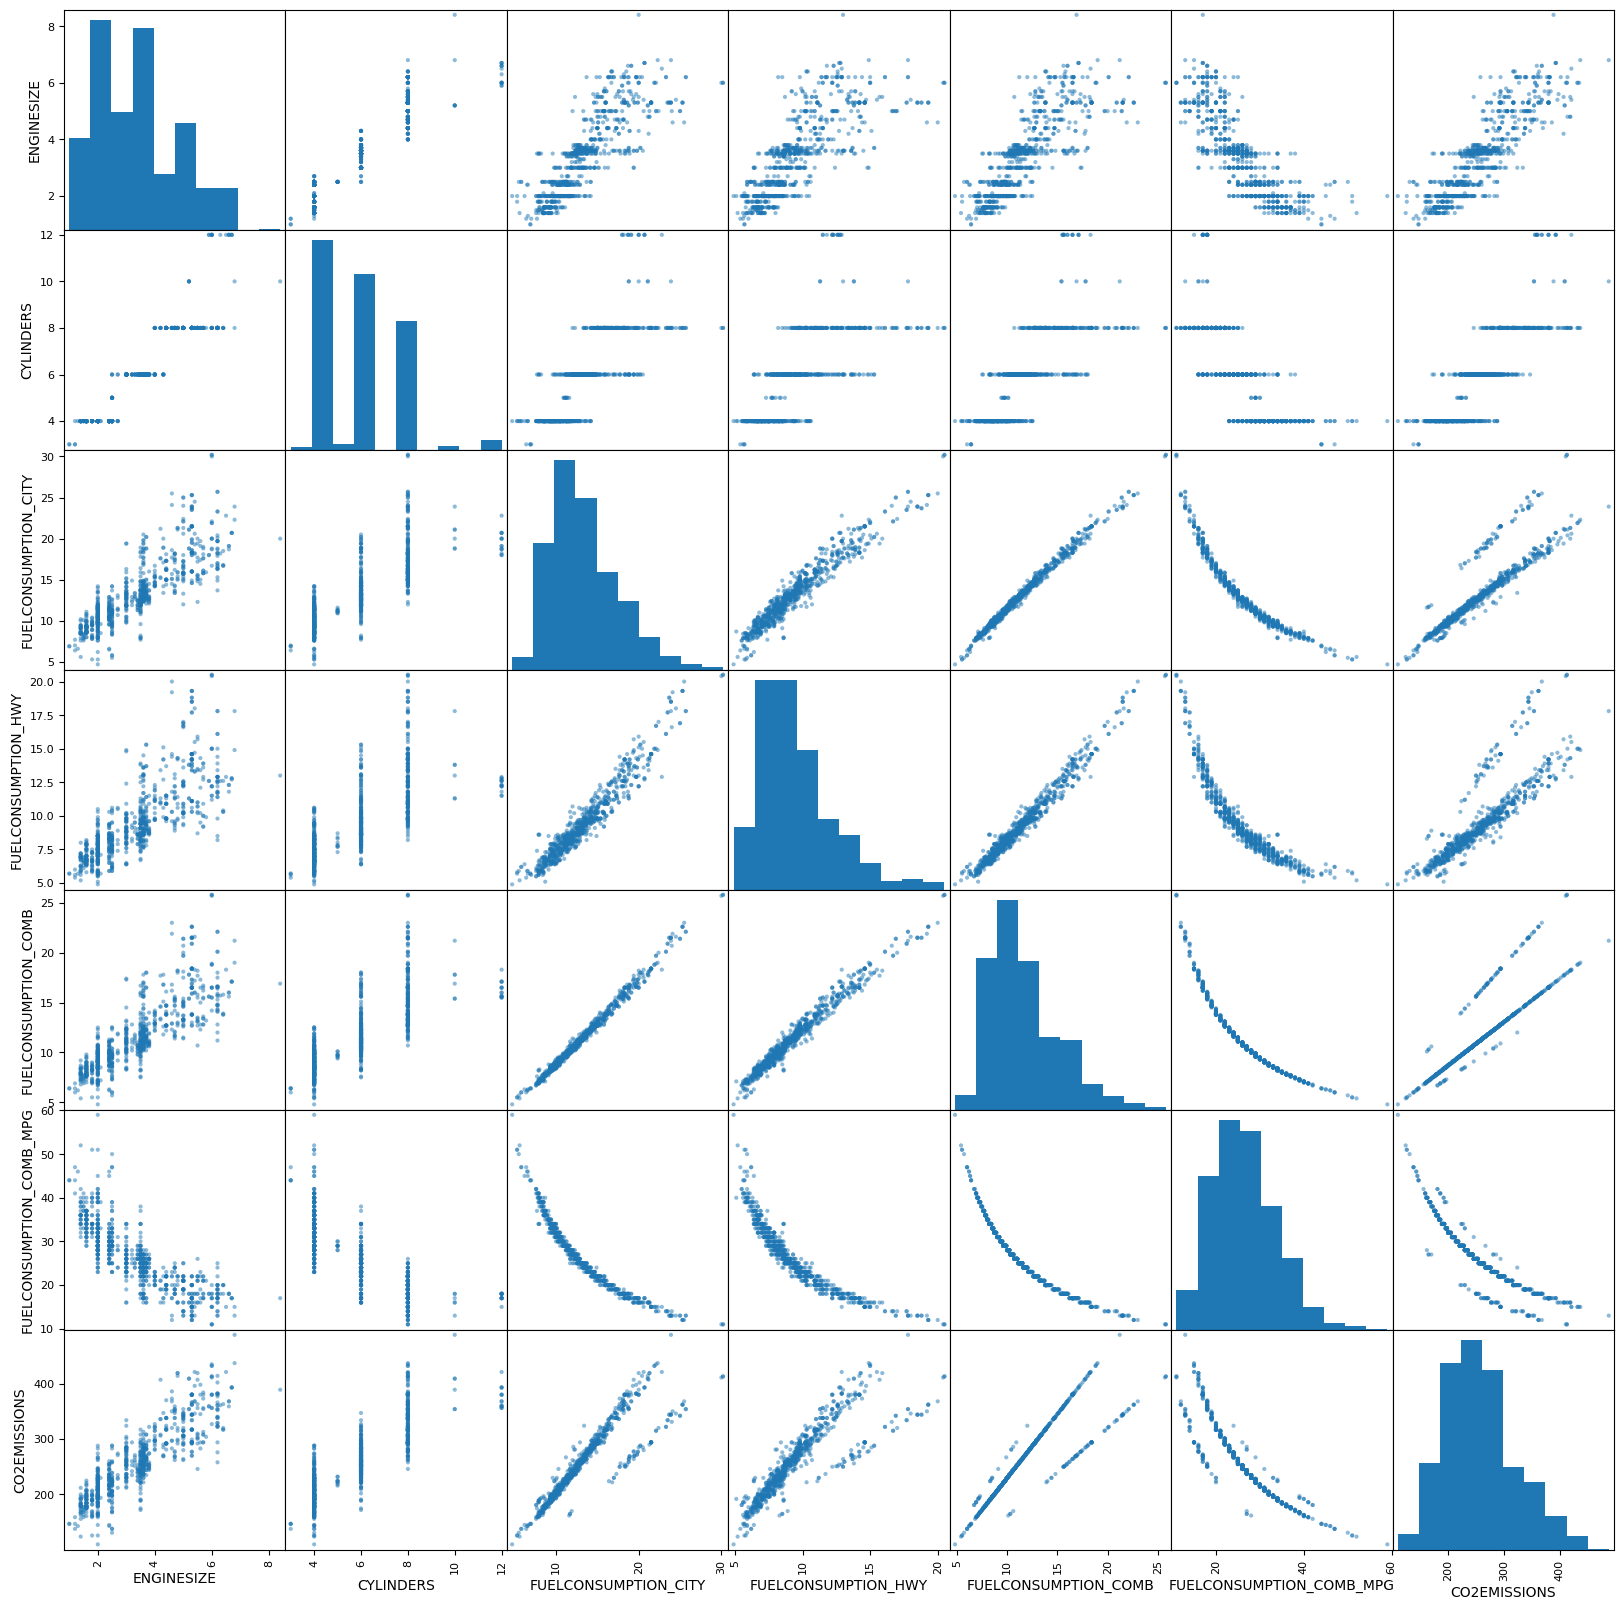

In [13]:
from pandas.plotting import scatter_matrix

attributes='ENGINESIZE CYLINDERS FUELCONSUMPTION_CITY FUELCONSUMPTION_HWY FUELCONSUMPTION_COMB FUELCONSUMPTION_COMB_MPG CO2EMISSIONS'.split()
scatter_matrix(train_set[attributes],figsize=(20,20))
plt.show()

## Scaling the data

In [14]:
x_train_unscaled=train_set.drop('CO2EMISSIONS',axis=1)
x_test_unscaled=test_set.drop('CO2EMISSIONS',axis=1)
y_train=train_set['CO2EMISSIONS'].copy()
y_test=test_set['CO2EMISSIONS'].copy()


In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train_unscaled)
x_test=std_scaler.transform(x_test_unscaled)

## Testing diffrent regression models 

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [17]:
lin_rmses=-cross_val_score(lin_reg,x_train,y_train,scoring='neg_root_mean_squared_error',cv=10)

pd.Series(lin_rmses).describe()


count    10.000000
mean     21.427137
std       2.806849
min      15.755165
25%      20.132554
50%      21.057530
75%      23.617409
max      24.970832
dtype: float64

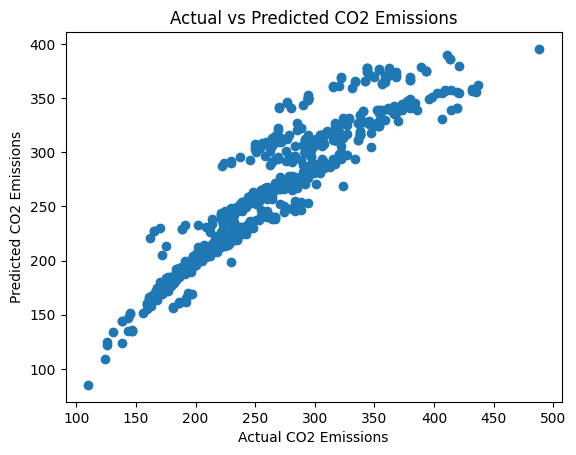

In [18]:
y_pred_lin = cross_val_predict(lin_reg,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_lin)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

## DecisionTree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
tree_rmses2=-cross_val_score(tree_reg,x_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
tree_rmses2
pd.Series(tree_rmses2).describe()

count    10.000000
mean     13.547491
std       6.998067
min       4.118873
25%       8.872040
50%      12.483823
75%      19.877720
max      24.082945
dtype: float64

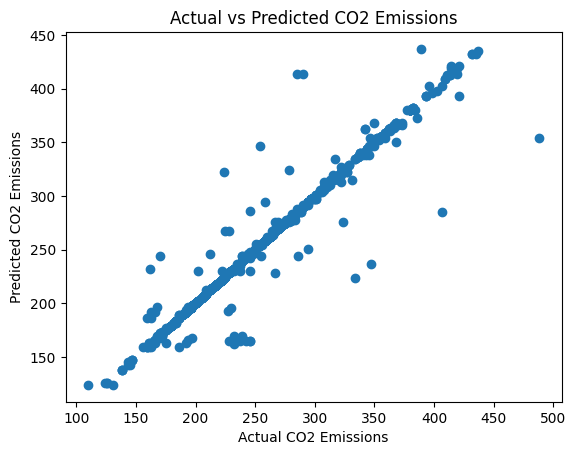

In [21]:
y_pred_tree = cross_val_predict(tree_reg,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_tree)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

## RandomForest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rndm_forest=RandomForestRegressor(random_state=42)
rndm_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [23]:
forest_rmses=-cross_val_score(rndm_forest,x_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
forest_rmses
pd.Series(forest_rmses).describe()

count    10.000000
mean     11.246392
std       4.289642
min       5.952629
25%       9.307475
50%       9.778000
75%      14.303763
max      18.755581
dtype: float64

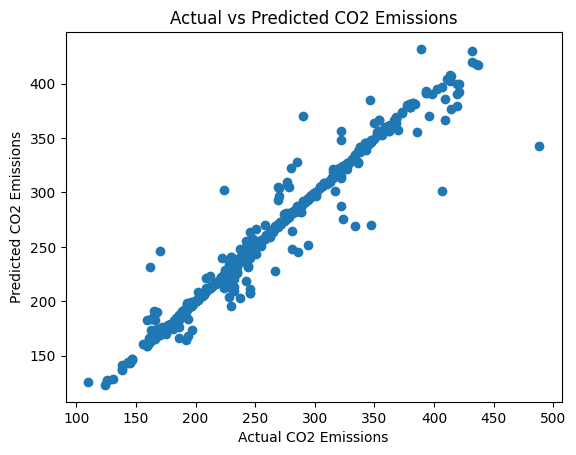

In [24]:
y_pred_forest = cross_val_predict(rndm_forest,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_forest)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

## Testing on the test set

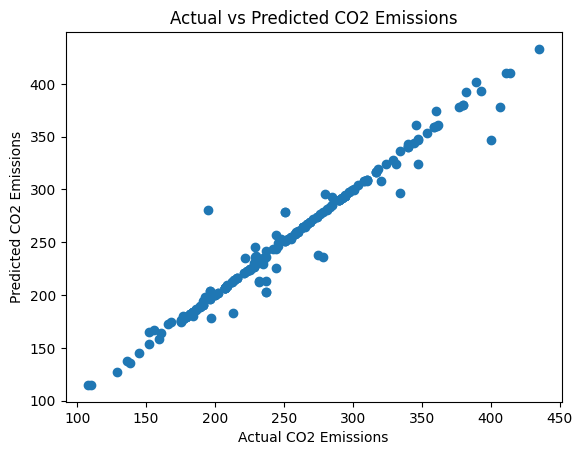

In [25]:
y_test_pred =rndm_forest.predict(x_test)
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()


## GUI for user input and Testing


In [26]:
import tkinter as tk

# Function to handle button click
def on_process_button_click():
    # Get values from entry widgets
    p1 = entry1.get()
    p2 = entry2.get()
    p3 = entry3.get()
    p4 = entry4.get()
    p5 = entry5.get()
    p6 = entry6.get()
    data = pd.DataFrame({
    'ENGINESIZE': [p1],
    'CYLINDERS': [p2],
    'FUELCONSUMPTION_CITY': [p3],
    'FUELCONSUMPTION_HWY': [p4],
    'FUELCONSUMPTION_COMB': [p5],
    'FUELCONSUMPTION_COMB_MPG': [p6]})
    print(data)
    data=std_scaler.transform(data)
    y_user_pred=rndm_forest.predict(data)
    result = f"Model Prediction: {y_user_pred}"
    output_label.config(text=result)



# Create the main Tkinter window
window = tk.Tk()
window.configure(bg='#363062')
window.title("User Input Testing")


# Create labels for parameters
label1 = tk.Label(window, text="ENGINESIZE",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))
label2 = tk.Label(window, text="CYLINDERS:",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))
label3 = tk.Label(window, text="FUELCONSUMPTION_CITY:",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))
label4 = tk.Label(window, text="FUELCONSUMPTION_HWY:",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))
label5 = tk.Label(window, text="FUELCONSUMPTION_COMB:",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))
label6 = tk.Label(window, text="FUELCONSUMPTION_COMB_MPG:",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))

# Create entry widgets for parameters
entry1 = tk.Entry(window, width=10)
entry2 = tk.Entry(window, width=10)
entry3 = tk.Entry(window, width=10)
entry4 = tk.Entry(window, width=10)
entry5 = tk.Entry(window, width=10)
entry6 = tk.Entry(window, width=10)

# Create a button to process the parameters
process_button = tk.Button(window, text="Predict", command=on_process_button_click)

# Create a label to display the output
output_label = tk.Label(window, text="",bg='#363062',fg='#F5E8C7', font=('Helvetica', 15, 'bold'))

# Grid layout for widgets
label1.grid(row=0, column=0)
entry1.grid(row=0, column=1)
label2.grid(row=1, column=0)
entry2.grid(row=1, column=1)
label3.grid(row=2, column=0)
entry3.grid(row=2, column=1)
label4.grid(row=3, column=0)
entry4.grid(row=3, column=1)
label5.grid(row=4, column=0)
entry5.grid(row=4, column=1)
label6.grid(row=5, column=0)
entry6.grid(row=5, column=1)

process_button.grid(row=6, column=0, columnspan=2)
output_label.grid(row=7, column=0, columnspan=2)

# Start the Tkinter event loop
window.mainloop()
